In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.simplefilter('ignore')

In [19]:
ds = pd.read_csv('D:/3Kurs/1Sem/SS/rgr/Data/Life_Expectancy_Data.csv')


In [20]:
print(ds.shape)
print(ds.nunique())

(2938, 22)
Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64


## First I will do business and data understanding

https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

### Attribute Information
1) Country: Country

2) Year: year

3) Status: Developed or Developing status

4) Life Expectancy: Life Expectancy in age

5) Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

6) Infant Deaths: Number of Infant Deaths per 1000 population

7) Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

8) percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)

9) Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

10) Measles: Measles - number of reported cases per 1000 population

11) BMI: Average Body Mass Index of entire population

12) under-five deaths: Number of under-five deaths per 1000 population

13) Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)

14) Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)

15) Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

16) HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)

17) GDP: Gross Domestic Product per capita (in USD)

18) Population: Population of the country

19) thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (%)

20) thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)

21) Income composition: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

22) Schooling: Number of years of Schooling(years)

In [21]:
r = 0
missing = list()
for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum(), "\t\t\t\t\t",round((ds[x].isnull().sum()*100)/ds.shape[0],2),"%")
        missing.append(x)
        r+=1

print("\nCount columns: ", r)

Life expectancy  10 					 0.34 %
Adult Mortality 10 					 0.34 %
Alcohol 194 					 6.6 %
Hepatitis B 553 					 18.82 %
 BMI  34 					 1.16 %
Polio 19 					 0.65 %
Total expenditure 226 					 7.69 %
Diphtheria  19 					 0.65 %
GDP 448 					 15.25 %
Population 652 					 22.19 %
 thinness  1-19 years 34 					 1.16 %
 thinness 5-9 years 34 					 1.16 %
Income composition of resources 167 					 5.68 %
Schooling 163 					 5.55 %

Count columns:  14


In [22]:
missing_rows = ds[ds.isnull().sum(axis=1) >= 5]

print(missing_rows.shape[0],'\n')
print(ds.shape[0])
print("Percentage of rows with more than or equal to 5 missing values:",round((missing_rows.shape[0]*100)/ds.shape[0],3),"%\n")


86 

2938
Percentage of rows with more than or equal to 5 missing values: 2.927 %



In [23]:
ds.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [24]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### I'm going to modify the dataset a bit for better use in the future, it has such problems as column names and incorrect spelling

In [25]:
ds.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [26]:
ds_fixed = ds.copy()

In [27]:
ds_fixed.rename(columns={'Adult Mortality': 'Adult_Mortality'}, inplace=True)
ds_fixed.rename(columns={'Life expectancy ': 'Life_expectancy'}, inplace=True)
ds_fixed.rename(columns={'infant deaths': 'Infant_deaths'}, inplace=True)
ds_fixed.rename(columns={'percentage expenditure': 'Percentage_expenditure'}, inplace=True)
ds_fixed.rename(columns={'Hepatitis B': 'Hepatitis_B'}, inplace=True)
ds_fixed.rename(columns={'Measles ': 'Measles'}, inplace=True)
ds_fixed.rename(columns={' BMI ': 'BMI'}, inplace=True)
ds_fixed.rename(columns={'under-five deaths ': 'Under_five_deaths'}, inplace=True)
ds_fixed.rename(columns={'Total expenditure': 'Total_expenditure'}, inplace=True)
ds_fixed.rename(columns={'Diphtheria ': 'Diphtheria'}, inplace=True)
ds_fixed.rename(columns={' HIV/AIDS': 'Incidents_HIV'}, inplace=True)
ds_fixed.rename(columns={' thinness  1-19 years': 'Thinness_ten_nineteen_years'}, inplace=True)
ds_fixed.rename(columns={' thinness 5-9 years': 'Thinness_five_nine_years'}, inplace=True)
ds_fixed.rename(columns={'Income composition of resources': 'Income_composition_of_resources'}, inplace=True)


ds_fixed

,Country,Year,Status,Life_expectancy,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,Incidents_HIV,GDP,Population,Thinness_ten_nineteen_years,Thinness_five_nine_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [28]:
ds_fixed.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'Infant_deaths', 'Alcohol', 'Percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'Under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'Incidents_HIV', 'GDP', 'Population',
       'Thinness_ten_nineteen_years', 'Thinness_five_nine_years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [29]:
ds_fixed.to_csv('D:/3Kurs/1Sem/SS/rgr/Data/Life_Expectancy_Data_fixed.csv')

In [30]:
ds = pd.read_csv('D:/3Kurs/1Sem/SS/rgr/Data/Life_Expectancy_Data_fixed.csv')

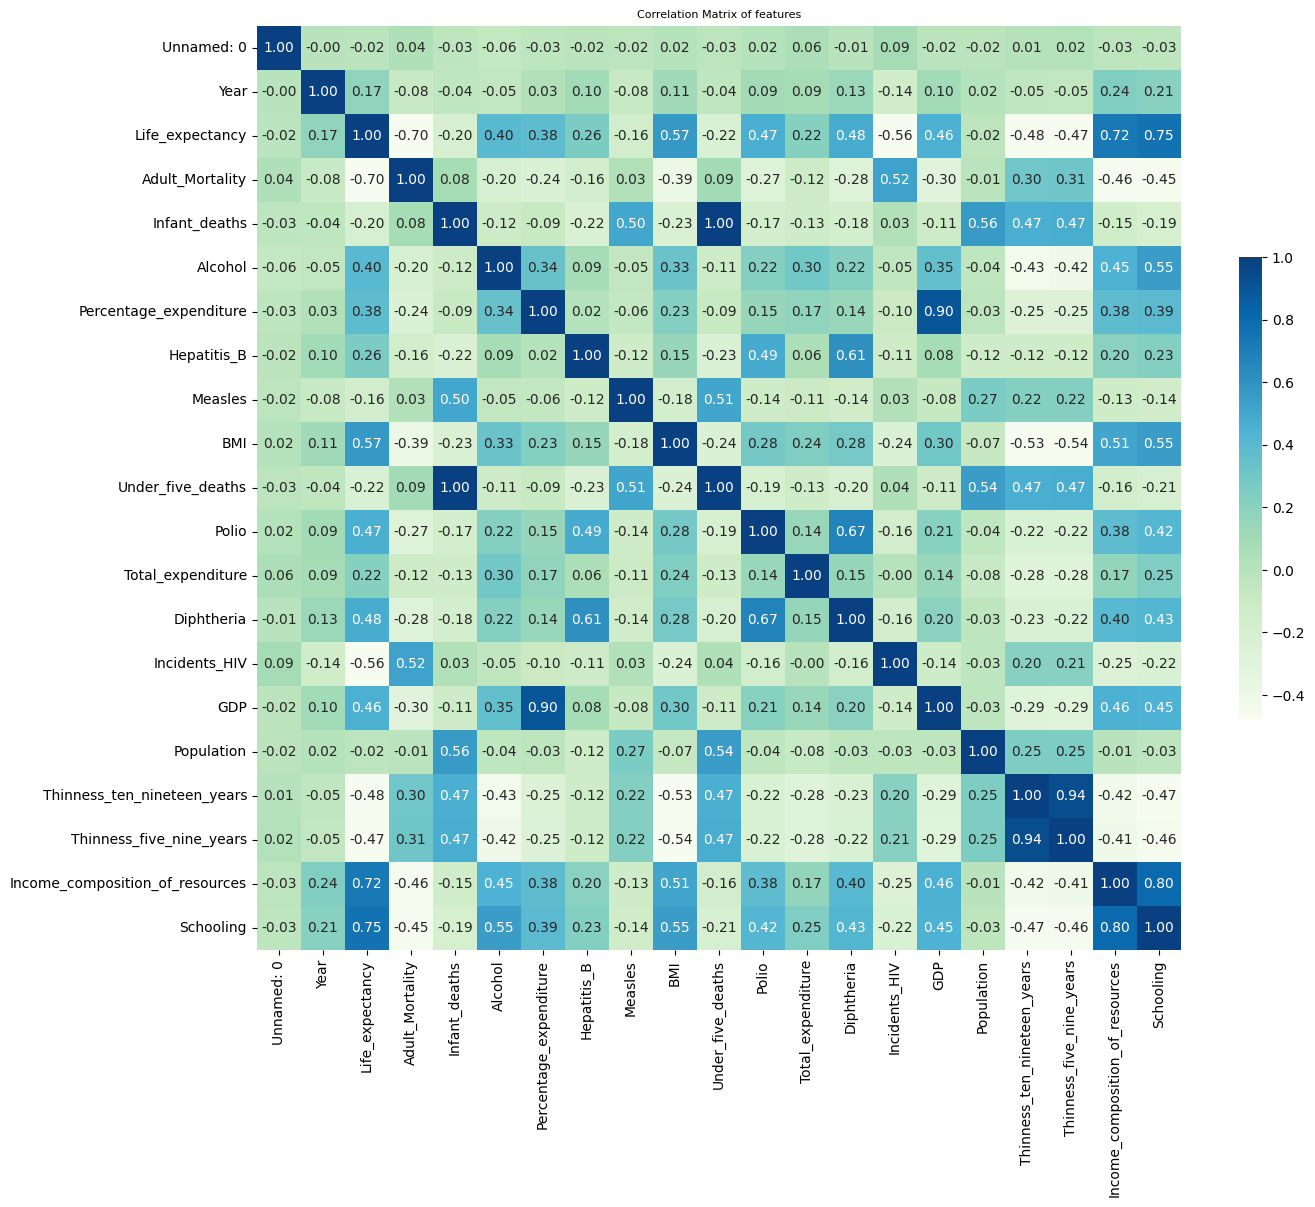

In [31]:
numeric_columns = ds.select_dtypes(include=['number']).columns



plt.rcParams["figure.figsize"] = (15,12)
correlation_matrix = ds[numeric_columns].corr()
sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='GnBu',
    cbar_kws={"shrink": .5},
    robust=True)
plt.title('Correlation Matrix of features', fontsize=8)
plt.show()

### Since the 'Under_five_deaths' and 'Infant_deaths' columns are directly dependent on each other (as you can see in the correlation matrix), I will delete one of them, namely the 'Infant_deaths' column, because it is already included in the 'Under_five_deaths' column

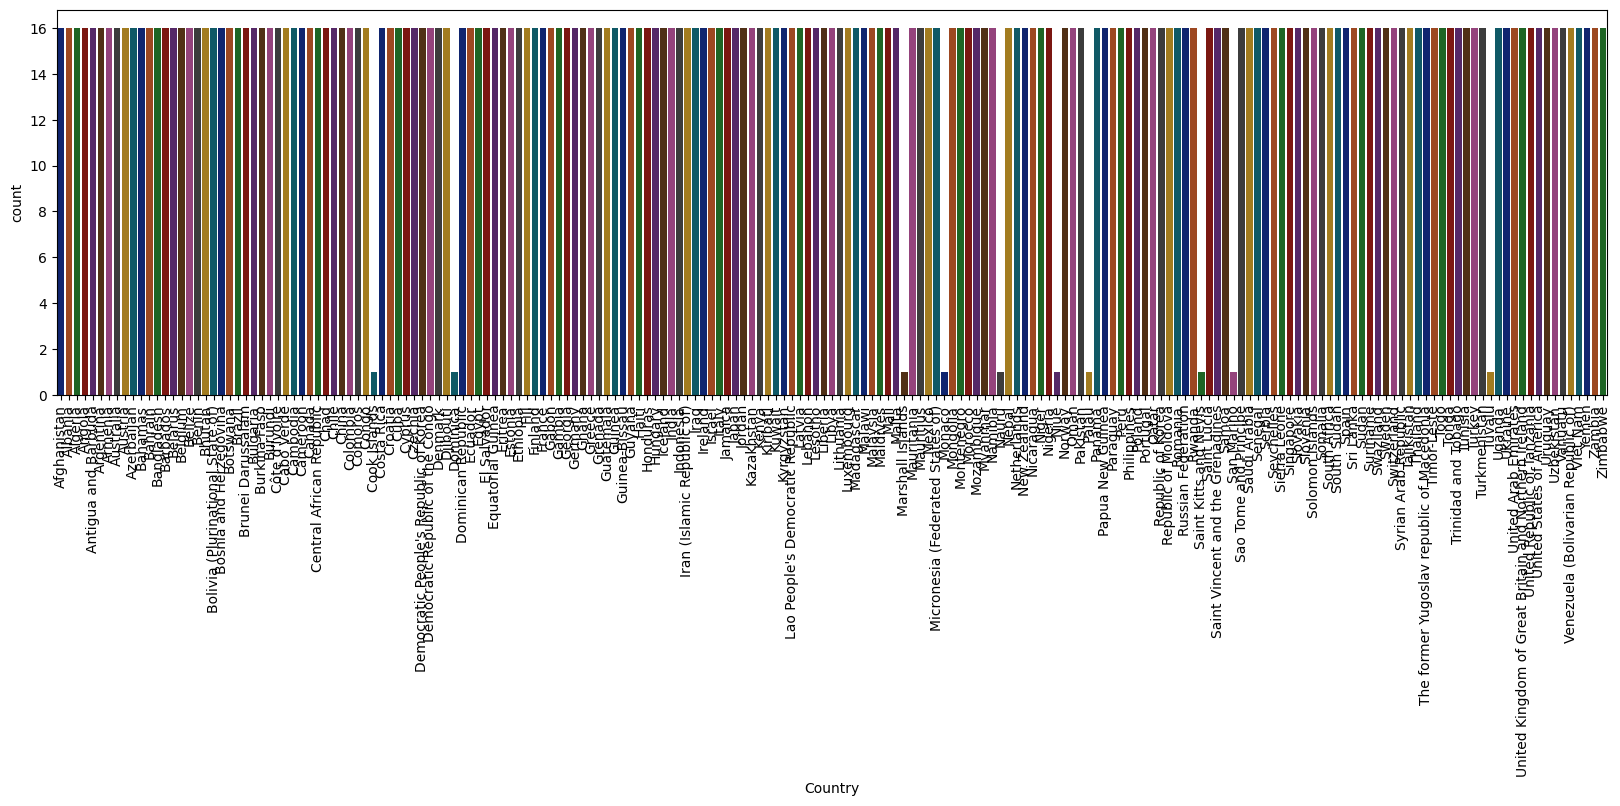

In [32]:
plt.rcParams["figure.figsize"] = (20, 5)
sns.countplot(x="Country", data=ds, palette="dark")
plt.title("")
plt.xticks(rotation=90)

plt.show()

In [33]:
row_country = ds[ds['Country'] == 'Marshall Islands']
row = ds[ds['Country'] == 'Cook Islands']
row_country = pd.concat([row_country, row], ignore_index=True)
row = ds[ds['Country'] == 'Dominica']
row_country = pd.concat([row_country, row], ignore_index=True)
row = ds[ds['Country'] == 'Monaco']
row_country = pd.concat([row_country, row], ignore_index=True)
row = ds[ds['Country'] == 'Nauru']
row_country = pd.concat([row_country, row], ignore_index=True)
row = ds[ds['Country'] == 'Niue']
row_country = pd.concat([row_country, row], ignore_index=True)
row = ds[ds['Country'] == 'Saint Kitts and Nevis']
row_country = pd.concat([row_country, row], ignore_index=True)
row = ds[ds['Country'] == 'San Marino']
row_country = pd.concat([row_country, row], ignore_index=True)
row = ds[ds['Country'] == 'Tuvalu']
row_country = pd.concat([row_country, row], ignore_index=True)
row = ds[ds['Country'] == 'Palau']
row_country = pd.concat([row_country, row], ignore_index=True)
row_country.head(10)

,Unnamed: 0,Country,Year,Status,Life_expectancy,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,Incidents_HIV,GDP,Population,Thinness_ten_nineteen_years,Thinness_five_nine_years,Income_composition_of_resources,Schooling
0,1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1,624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
2,769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
3,1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
4,1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
5,1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
6,2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
7,2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
8,2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0
9,1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2


### Since there is only one year of information for these ten countries, I will delete them soon

In [36]:
fig=px.line(ds.sort_values(by='Year'),x='Year',y='Life_expectancy',animation_frame='Country',animation_group='Year',color='Country',markers=True,template='plotly_dark',title='<b> Country wise Life Expectancy over Years')
fig.show()

In [37]:
fig=px.line(ds.sort_values(by='Year'),x='Year',y='GDP',animation_frame='Country',animation_group='Year',color='Country',markers=True,template='plotly_dark',title='<b> Country wise GDP per Capita over Years')
fig.show()

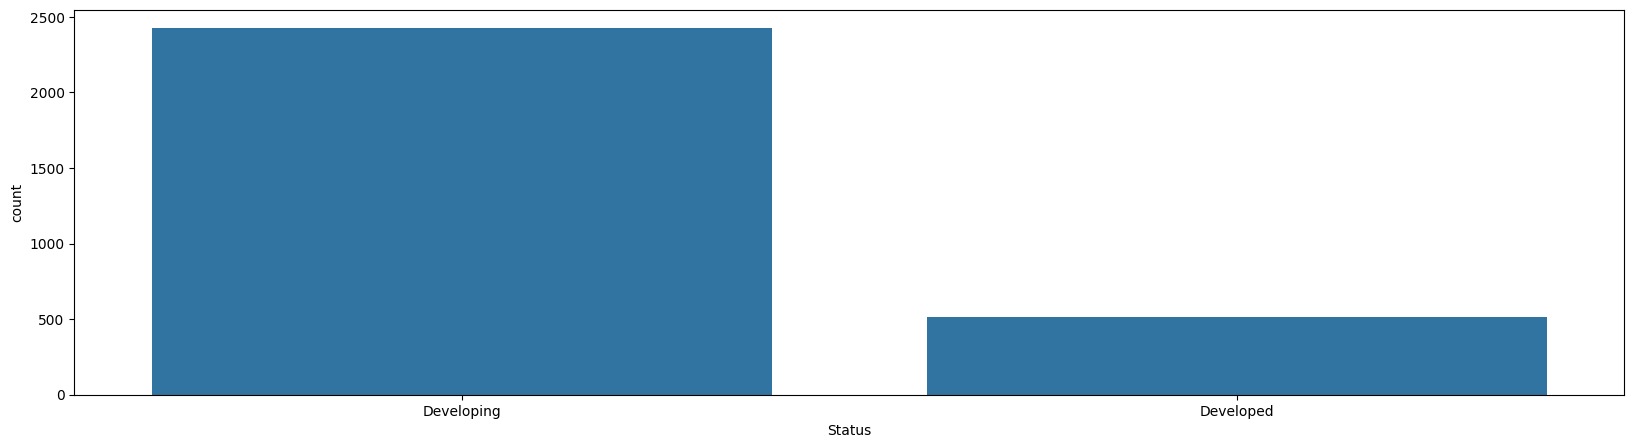

In [39]:
sns.countplot(x='Status',data=ds)
plt.show()

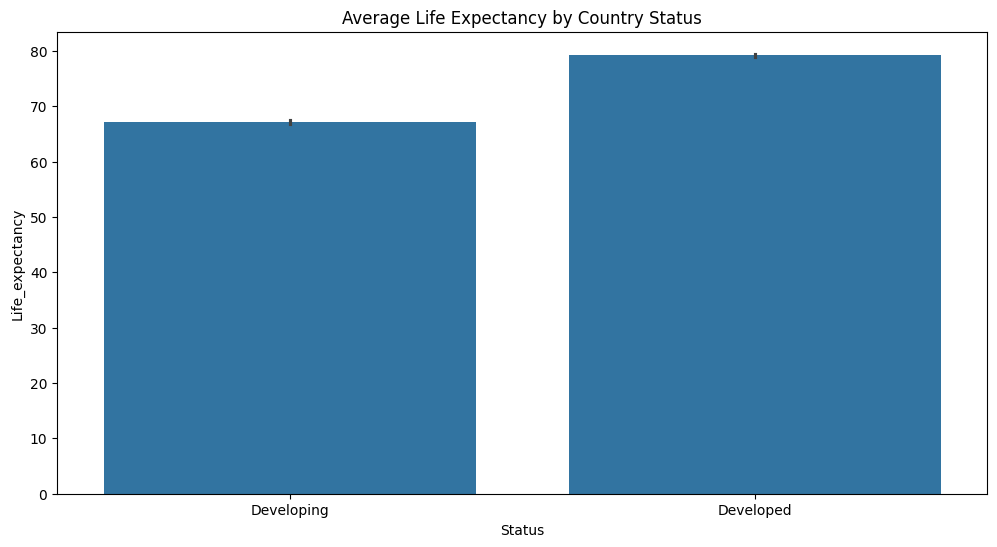

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Status', y='Life_expectancy', data=ds)
plt.title('Average Life Expectancy by Country Status')
plt.show()

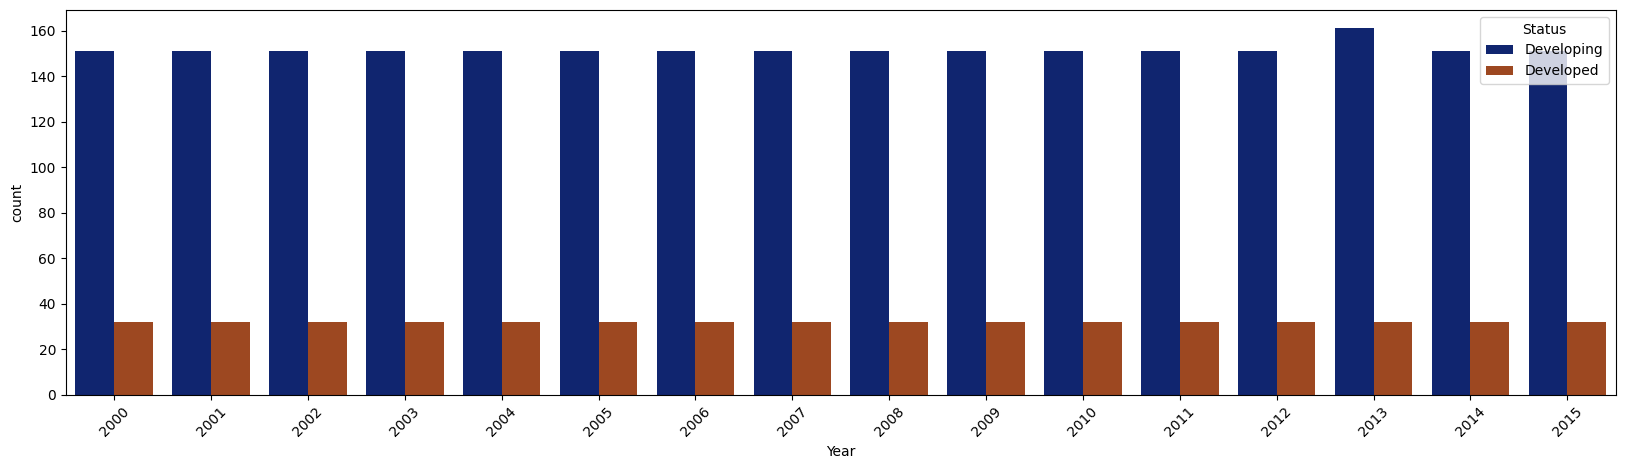

In [42]:
plt.rcParams["figure.figsize"] = (20, 5)
sns.countplot(x="Year", hue="Status", data=ds, palette="dark")
plt.xticks(rotation=45)

plt.show()

### The graph shows that only in 2013 the number of underdeveloped countries increased, and these are exactly the countries I will delete so that they do not negatively affect the model

In [44]:
ds.columns

Index(['Unnamed: 0', 'Country', 'Year', 'Status', 'Life_expectancy',
       'Adult_Mortality', 'Infant_deaths', 'Alcohol', 'Percentage_expenditure',
       'Hepatitis_B', 'Measles', 'BMI', 'Under_five_deaths', 'Polio',
       'Total_expenditure', 'Diphtheria', 'Incidents_HIV', 'GDP', 'Population',
       'Thinness_ten_nineteen_years', 'Thinness_five_nine_years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

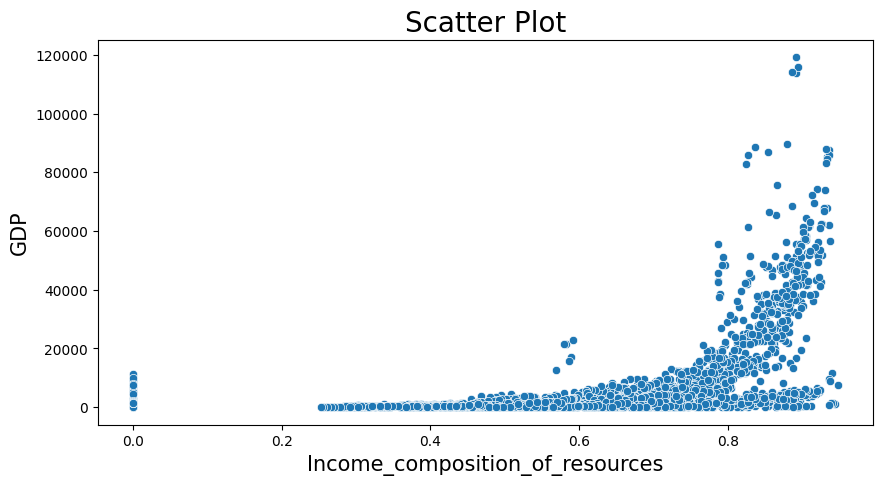

In [45]:
plt.rcParams["figure.figsize"] = (10, 5)
sns.scatterplot(x="Income_composition_of_resources", y="GDP", data=ds)
plt.title("Scatter Plot", fontsize=20)
plt.xlabel("Income_composition_of_resources", fontsize=15)
plt.ylabel("GDP", fontsize=15)
plt.show()

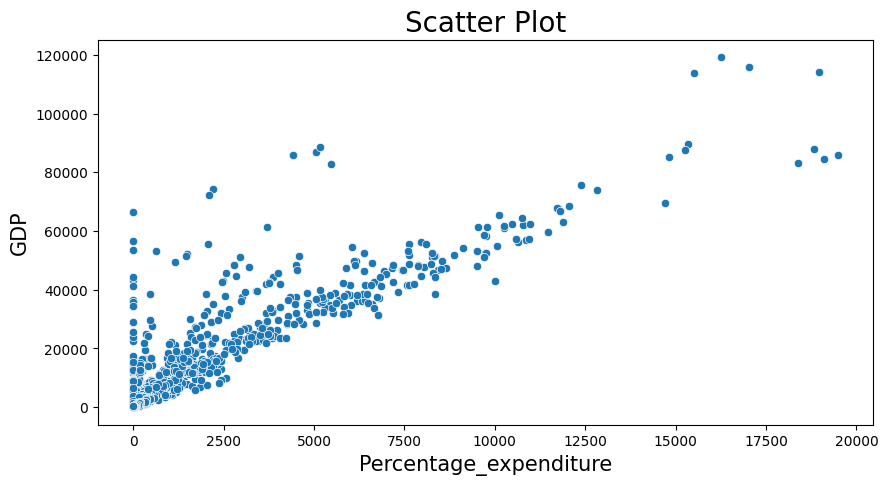

In [48]:
plt.rcParams["figure.figsize"] = (10, 5)
sns.scatterplot(x="Percentage_expenditure", y="GDP", data=ds)
plt.title("Scatter Plot", fontsize=20)
plt.xlabel("Percentage_expenditure", fontsize=15)
plt.ylabel("GDP", fontsize=15)
plt.show()

In [50]:
fig=px.line(ds.sort_values(by='Year'),x='Year',y='Schooling',animation_frame='Country',animation_group='Year',color='Country',markers=True,template='plotly_dark',title='<b> Country wise Life Expectancy over Years')
fig.show()